In [1]:
%matplotlib inline



# Spanning Trees

This example shows how to generate a spanning tree from an input graph using :meth:`igraph.Graph.spanning_tree`. For the related idea of finding a *minimum spanning tree*, see `tutorials-minimum-spanning-trees`.


In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import random

First we create a two-dimensional, 6 by 6 lattice graph:



In [3]:
g = ig.Graph.Lattice([6, 6], circular=False)

We can compute the 2D layout of the graph:



In [4]:
layout = g.layout("grid")

To spice things up a little, we rearrange the vertex ids and compute a new
layout. While not terribly useful in this context, it does make for a more
interesting-looking spanning tree ;-)



In [5]:
random.seed(0)
permutation = list(range(g.vcount()))
random.shuffle(permutation)
g = g.permute_vertices(permutation)
new_layout = g.layout("grid")
for i in range(36):
    new_layout[permutation[i]] = layout[i]
layout = new_layout

We can now generate a spanning tree:



In [6]:
spanning_tree = g.spanning_tree(weights=None, return_tree=False)

Finally, we can plot the graph with a highlight color for the spanning tree.
We follow the usual recipe: first we set a few aesthetic options and then we
leverage :func:`igraph.plot() <igraph.drawing.plot>` and matplotlib for the
heavy lifting:



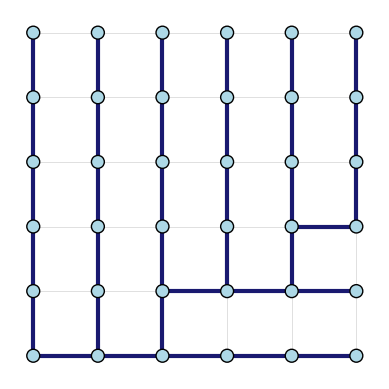

In [7]:
g.es["color"] = "lightgray"
g.es[spanning_tree]["color"] = "midnightblue"
g.es["width"] = 0.5
g.es[spanning_tree]["width"] = 3.0

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_color="lightblue",
    edge_width=g.es["width"]
)
plt.show()